In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [7]:
df=pd.read_excel(r"C:\Users\vijit\Downloads\archive (21)\Payroll Data.xlsx")

In [8]:
df.head()

,Emp Count,Employee ID,First Name,Last Name,Business Unit Code,Busines Unit Name,Continuous Service Date,Country Name,Date Of Birth,Age,...,Basic Salary,Allowance,Statutory Bonus,Gross Salary,Arrear Special Allowance,Total Deductions,Arrear Statutory Bonus,Net Salary,Tax Spend,Reimbursement Paid
0,1,1692406,NaN,NaN,NaN,NaN,NaT,India,NaT,20,...,55725.24,4785.05,23508.9,1400000,500,NaN,NaN,104500,1251116,3885797
1,2,1527750,NaN,NaN,NaN,NaN,NaT,India,NaT,20,...,139174.88,16340.50,23508.9,400000,1000,NaN,NaN,10390,1551116,4227696
2,3,1527991,Caylen,Forde,NaN,NaN,NaT,India,1984-07-20,38,...,245879.12,0.00,23508.9,100000,2000,8000.0,NaN,97400,1966589,4950655
3,4,NaN,NaN,NaN,EL-ET-SG-11,Travel Inc.,NaT,India,NaT,20,...,101494.34,7824.99,23508.9,300000,500,1000.0,NaN,93500,2519188,1117199
4,5,NaN,NaN,NaN,EL-ET-SG-11,Travel Inc.,NaT,India,NaT,20,...,101345.12,22284.37,23508.9,600000,500,1000.0,NaN,90500,2132385,1801559


In [9]:
df.isnull()

,Emp Count,Employee ID,First Name,Last Name,Business Unit Code,Busines Unit Name,Continuous Service Date,Country Name,Date Of Birth,Age,...,Basic Salary,Allowance,Statutory Bonus,Gross Salary,Arrear Special Allowance,Total Deductions,Arrear Statutory Bonus,Net Salary,Tax Spend,Reimbursement Paid
0,False,False,True,True,True,True,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
1,False,False,True,True,True,True,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,True,True,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,False,True,True,True,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3212,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [10]:
df1= df.copy()

In [11]:
df1 = df1.drop(
    columns=[
        "Continuous Service Date",
        "Date Of Termination",
        "Last Working Date",
        "ReHire Date",
        "Resignation Date",
        "First Name",
        "Last Name"
    ],
errors="ignore")

In [12]:
df1.isna().sum()

Emp Count                      0
Employee ID                    2
Business Unit Code             3
Busines Unit Name              3
Country Name                   0
Date Of Birth                244
Age                            0
Age Range                    245
Date Of Joining              226
Experience                   226
Tenure                         0
EfectiveStart Date             0
Effective End Date             0
Employee Catagery            384
Employee Status                0
Employee Type                  0
Etinicity                      0
Departments                    0
Gender                         0
Grade                        225
Designations                 221
Leave Status                 418
Country                        0
Martial Status               400
Continent                    244
Frequency                    251
Payroll Employee Status        0
Payroll End Date             217
Payroll Start Date           217
Pay Period                    43
Basic Sala

In [13]:
# fill missing numeric payroll values
df1["Total Deductions"] = df1["Total Deductions"].fillna(0)
df1["Arrear Statutory Bonus"] = df1["Arrear Statutory Bonus"].fillna(0)


In [14]:
df1= df1.drop(
    columns=[
        "Emp Count",
        "Date Of Birth",
        "Date Of Joining",
        "Payroll Start Date",
        "Payroll End Date",
        "Pay Period"
    ],
    errors="ignore"
)


In [15]:
df1.columns = df1.columns.str.lower().str.replace(" ", "_")


In [16]:
df1["net_gross_ratio"] = df1["net_salary"] / df1["gross_salary"]
df1["deduction_ratio"] = df1["total_deductions"] / df1["gross_salary"]


In [17]:
df1[["gross_salary", "net_salary", "total_deductions"]].describe()


,gross_salary,net_salary,total_deductions
count,3.216000e+03,3.216000e+03,3216.000000
mean,5.794258e+05,9.285491e+04,6723.911692
std,5.999637e+05,3.787696e+04,4211.178422
min,2.400000e+03,1.003000e+04,0.000000
25%,2.370000e+05,8.130000e+04,8000.000000
50%,4.000000e+05,8.960000e+04,8000.000000
75%,7.000000e+05,1.002000e+05,8000.000000
max,8.578100e+06,1.150600e+06,85000.000000


In [18]:
df1["deduction_ratio"].describe()


count    3216.000000
mean        0.022183
std         0.031406
min         0.000000
25%         0.006667
50%         0.016000
75%         0.027778
max         0.850000
Name: deduction_ratio, dtype: float64

In [19]:
df1["payroll_risk"] = 0

df1.loc[
    (df1["deduction_ratio"] > 0.15) |
    (df1["net_gross_ratio"] > 0.90),
    "payroll_risk"
] = 1


In [20]:
df1["payroll_risk"].value_counts()


payroll_risk
0    3078
1     138
Name: count, dtype: int64

In [21]:
X = df1[["net_gross_ratio", "deduction_ratio"]]
y = df1["payroll_risk"]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [23]:
#logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
#XGBoost
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [26]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": xgb
}


In [27]:
results = []

for name, model in models.items():
    preds = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1 Score": f1_score(y_test, preds, zero_division=0)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.984472,1.0,0.615385,0.761905
1,Random Forest,0.996894,1.0,0.923077,0.960000
2,Gradient Boosting,0.996894,1.0,0.923077,0.960000


In [28]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
})

feature_importance


,Feature,Importance
0,net_gross_ratio,0.752943
1,deduction_ratio,0.247057


<Axes: title={'center': 'Feature Importance'}, xlabel='Feature'>

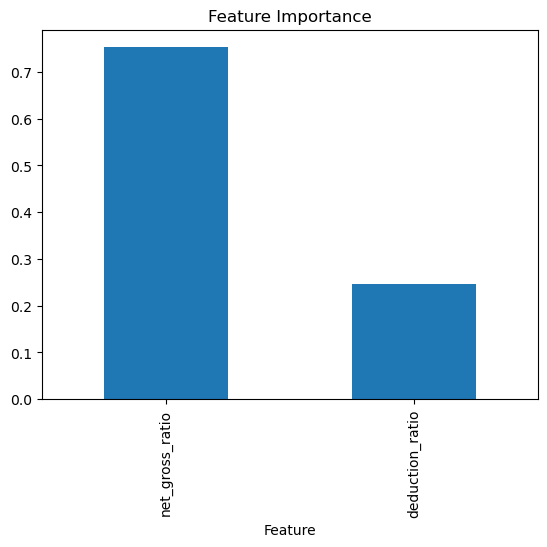

In [29]:
feature_importance.sort_values("Importance", ascending=False).plot(
    x="Feature", y="Importance", kind="bar", legend=False, title="Feature Importance"
)


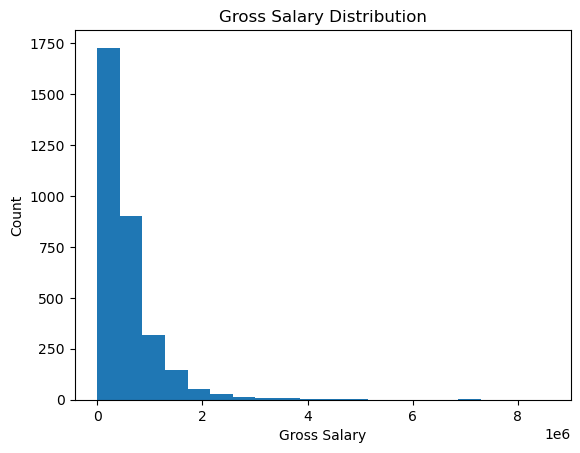

In [30]:
# salary distribution

plt.hist(df1["gross_salary"], bins=20)
plt.xlabel("Gross Salary")
plt.ylabel("Count")
plt.title("Gross Salary Distribution")
plt.show()
